# Web Scrapping Comparis

In [212]:
import os
import math
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
from getpass import getpass
import csv
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd


# 1. Get the links --> Runde 2 with selenium

In [322]:
wdpath = "chromedriver"
driver = webdriver.Chrome(wdpath)

In [323]:
## for page 1
#### change city
url="https://www.comparis.ch/immobilien/marktplatz/bern/wohnung/mieten?page=2"
driver.get(url)

In [324]:
driver.execute_script("document.body.style.zoom = '0.1'")

In [325]:
flats_link = driver.find_elements_by_class_name("excbu0j3")

In [326]:
flat_links = list(set([flats.get_attribute('href') for flats in flats_link]))
flat_links

['',
 'https://www.comparis.ch/immobilien/result/list?requestobject=%7B%22DealType%22%3A10%2C%22SiteId%22%3A0%2C%22RootPropertyTypes%22%3A%5B1%5D%2C%22PropertyTypes%22%3Anull%2C%22RoomsFrom%22%3A%223%22%2C%22RoomsTo%22%3A%223.5%22%2C%22FloorSearchType%22%3A0%2C%22LivingSpaceFrom%22%3Anull%2C%22LivingSpaceTo%22%3Anull%2C%22PriceFrom%22%3A%22500%22%2C%22PriceTo%22%3A%221300%22%2C%22ComparisPointsMin%22%3A0%2C%22AdAgeMax%22%3A0%2C%22AdAgeInHoursMax%22%3Anull%2C%22Keyword%22%3A%22%22%2C%22WithImagesOnly%22%3Afalse%2C%22WithPointsOnly%22%3Anull%2C%22Radius%22%3Anull%2C%22MinAvailableDate%22%3Anull%2C%22MinChangeDate%22%3A%221753-01-01T00%3A00%3A00%22%2C%22LocationSearchString%22%3A%22Bern%22%2C%22Sort%22%3A11%2C%22HasBalcony%22%3Afalse%2C%22HasTerrace%22%3Afalse%2C%22HasFireplace%22%3Afalse%2C%22HasDishwasher%22%3Afalse%2C%22HasWashingMachine%22%3Afalse%2C%22HasLift%22%3Afalse%2C%22HasParking%22%3Afalse%2C%22PetsAllowed%22%3Afalse%2C%22MinergieCertified%22%3Afalse%2C%22WheelchairAccessible%

In [327]:
links = list(set([x if len(str(re.findall('https://www.comparis.ch/immobilien/marktplatz/details/show/', str(x))))>=3 else 0 for x in flat_links]))[1:]

links

['https://www.comparis.ch/immobilien/marktplatz/details/show/23014335',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23016559',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23016600',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23014346',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23014336',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23014342',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23016606',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23018295',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23014339',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23014344']

## 1.2. get number of result pages

In [328]:
#amount of links
nr = list(set([x[-3:] if len(str(re.findall('page', str(x))))>=3 else 0 for x in flat_links]))[0:]


nrlis = ["".join(re.findall('[0-9]', str(x))) for x in nr]
resultpages=int(max(nrlis))
resultpages


78

## 1.3 loop for all pages

In [334]:
urlOhnePage = url[:-1]
for i in range(1, (resultpages-1)):
    page_url = urlOhnePage + str(i)
    driver.get(page_url)
    driver.execute_script("document.body.style.zoom = '0.1'")
    time.sleep(2.34)
    flats_link = driver.find_elements_by_class_name("excbu0j3")
    flat_links = list(set([flats.get_attribute('href') for flats in flats_link]))
    lin= list(set([x if len(str(re.findall('https://www.comparis.ch/immobilien/marktplatz/details/show/', str(x))))>=3 else 0 for x in flat_links]))[1:]
    for x in lin: 
        links.append(x)

ProtocolError: ('Connection aborted.', ConnectionResetError(10054, 'Eine vorhandene Verbindung wurde vom Remotehost geschlossen', None, 10054, None))

'https://www.comparis.ch/immobilien/marktplatz/bern/wohnung/mieten?page=2'

In [335]:
len(links)

110

In [340]:
linkBern = pd.DataFrame(links)
linkBern.to_csv('linksBern.csv')

In [35]:

city = 'Bern'
## url for Bern and only flats
url = "https://www.comparis.ch/immobilien/result/list?requestobject=%7B%22DealType%22%3A10%2C%22SiteId%22%3A-1%2C%22RootPropertyTypes%22%3A%5B1%5D%2C%22PropertyTypes%22%3A%5B%5D%2C%22RoomsFrom%22%3Anull%2C%22RoomsTo%22%3Anull%2C%22FloorSearchType%22%3A0%2C%22LivingSpaceFrom%22%3Anull%2C%22LivingSpaceTo%22%3Anull%2C%22PriceFrom%22%3Anull%2C%22PriceTo%22%3Anull%2C%22ComparisPointsMin%22%3A-1%2C%22AdAgeMax%22%3A-1%2C%22AdAgeInHoursMax%22%3Anull%2C%22Keyword%22%3A%22%22%2C%22WithImagesOnly%22%3Anull%2C%22WithPointsOnly%22%3Anull%2C%22Radius%22%3Anull%2C%22MinAvailableDate%22%3A%221753-01-01T00%3A00%3A00%22%2C%22MinChangeDate%22%3A%221753-01-01T00%3A00%3A00%22%2C%22LocationSearchString%22%3A%22Bern%22%2C%22Sort%22%3A11%2C%22HasBalcony%22%3Afalse%2C%22HasTerrace%22%3Afalse%2C%22HasFireplace%22%3Afalse%2C%22HasDishwasher%22%3Afalse%2C%22HasWashingMachine%22%3Afalse%2C%22HasLift%22%3Afalse%2C%22HasParking%22%3Afalse%2C%22PetsAllowed%22%3Afalse%2C%22MinergieCertified%22%3Afalse%2C%22WheelchairAccessible%22%3Afalse%2C%22LowerLeftLatitude%22%3Anull%2C%22LowerLeftLongitude%22%3Anull%2C%22UpperRightLatitude%22%3Anull%2C%22UpperRightLongitude%22%3Anull%7D&page=0"

### 1.1 Get the Links from Page 1

<!DOCTYPE html>
<html lang="de-CH"><head><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"30d2eb686c","applicationID":"63661895","transactionName":"NAYHNkEFVhUCVUQICw1MJDFjS20PKlhEBAMRAhELXApwBw1SXAQW","queueTime":0,"applicationTime":441,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQ8DVlNQCBAGV1dUBgkOUw==",licenseKey:"30d2eb686c",applicationID:"63661895"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(25),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typ
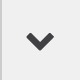
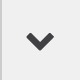

In [36]:
## get the soups
html = requests.get(url).content
html

soup = BeautifulSoup(html, "lxml")  # Check documentation to specify 'features'
soup.prettify()
soup

In [30]:
print(soup.title)

<title>mieten in Bern - Vergleiche 780 Inserate mit comparis.ch</title>


In [42]:
##get the links
#css-5snccb excbu0j0
link = []

for div in soup.find_all('div', attrs = {'class':'css-5snccb excbu0j0'}):
    for a in div.find_all('a'):
           link.append(a.get('href'))

link


['/immobilien/marktplatz/details/show/23024420',
 '/immobilien/marktplatz/details/show/23024399',
 '/immobilien/marktplatz/details/show/23024131',
 '/immobilien/marktplatz/details/show/23023616']

##### backup

In [6]:
# titles of flats --not needed --> delete
h3=soup.find_all('h3') 

beschreibung = [element.text for element in h3]
beschreibung

['Filter',
 '1.5 Zimmer, 30 m²',
 '1 Zimmer, 45 m²',
 '2.5 Zimmer, 59 m², 2. Etage',
 '2.5 Zimmer, 802 m²']

In [7]:
## price --> just as backup
price = soup.find_all('span', attrs = {'class':'css-19smxur excbu0j2'})
price
prices = [element.text for element in table]
prices

NameError: name 'table' is not defined

# 2. Detailed Infos for each flat 

## 2.1 List of links?

In [8]:
linkBern = ["https://www.comparis.ch"+l for l in link]
linkBern

['https://www.comparis.ch/immobilien/marktplatz/details/show/23024420',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23024399',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23024131',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23023616']

## 2.2 Infos for one flat

#### 2.2.0 get soup

In [9]:
url2 = linkBern[0]

html2 = requests.get(url2).content
html2

soup2 = BeautifulSoup(html2, "lxml")  # Check documentation to specify 'features'
soup2

<!DOCTYPE html>
<html lang="De">
<head>
<title>1½ Zimmer Wohnung in 3008 Bern  – Immobilienmarkt von comparis.ch</title>
<meta content="follow,noindex" name="robots"/>
<meta content="Wohnung, 1½ Zimmer Wohnung, Miete, 3008 Bern " name="keywords"/>
<meta content="1½ Zimmer Wohnung in 3008 Bern , Mietpreis / Monat 890 CHF  " name="description"/>
<meta content="comparis.ch AG" name="copyright"/>
<meta content="de" http-equiv="Content-Language"/>
<meta content="de" name="language"/>
<meta content="private" http-equiv="Cache-Control"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"30d2eb686c","applicationID":"63661895","transactionName":"NAYHNkEFVhUCVUQICw1MJDFjS20PKlhEBAMRAhELXApwBw1SXAQW","queueTime":0,"applicationTime":543,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQ8DVlNQC

In [10]:
nr = int(url2[-8:])
nr

23024420

In [11]:
source =pd.DataFrame.from_dict({'city': city, 'DateofScrapping': '26.02.2020'}, orient='index', columns = [nr] )
source

,23024420
city,Bern
DateofScrapping,26.02.2020


#### 2.2.1  Adress and Date of Publication

In [12]:
###

"""
<h3 class="text-green">Riedbachstrasse 80, 3027 Bern</h3>

"""
adress_soup = soup2.find_all('h3', attrs = {'class':'text-green'})
if len(adress_soup)==0:
    adress = {'adress': 'NaN'}
else:
    adress = {'adress': adress_soup[0].text}
adress
adress = pd.DataFrame.from_dict(adress, orient='index', columns = [nr] )
adress

,23024420
adress,"Freiburgstr. 62, 3008 Bern"


In [13]:
#Date of Publication

"""
<div class="row xsmall-12 columns">
        <ul class="meta-tag-line">
            <li>
                Erstmals gefunden am 26.02.2020
            </li>
        </ul>
    </div>
"""

publication={}
publication_soup = soup2.find_all('div', attrs = {'class':'row xsmall-12 columns'})
for element in publication_soup:
    for x in element.find_all('li'):
        publication['publication_date']=(x.text.replace('\r\n','').replace('Erstmals gefunden am ','').replace('\r\n','').replace(" ",''))
publication
publication_date = pd.DataFrame.from_dict(publication, orient='index', columns = [nr] )
publication_date

,23024420
publication_date,26.02.2020


#### (##2.2.2  Overview (First large table)##)

In [14]:
## Overview from one flat --> not used?
overview=[]
overview_soup = soup2.find_all('div', attrs = {'class':'item-price large'})
for element in overview_soup:
    for x in element.find_all('strong'):
        overview.append(x.text)
overview


['Wohnung', 'CHF 890', '1½', '30 m²', 'ca. CHF 112 /Jahr']

#### 2.2.3 Ratings

In [15]:
#### rating
"""
<div class="info-grid-content">
                    <span class="item-rating medium">
                        <strong>
                            <i class="text-green icon-comparis-points" data-icon="data-icon">
</i> 4
                        </strong>
                    </span>
                </div>
"""
rating_soup = soup2.find_all('span', attrs = {'class':'item-rating medium'})
if len(rating_soup)==0:
    rating = {'rating': 'NaN'}
else:
    rating = {'rating': re.findall('[0-9]',rating_soup[0].text)[0]}
rating
rating = pd.DataFrame.from_dict(rating, orient='index', columns = [nr] )
rating

,23024420
rating,NaN


In [16]:
rating_soup

[]

#### 2.2.4 Detailed overview (second smaller table)

In [17]:
infos_soup = soup2.find_all('dl')

### Categorie name
info1=[]
for x in infos_soup[0].find_all('dt'):
    info1.append(x.text.replace(" ","").replace("\r\n",""))

info1

### actual info

info2=[]
for x in infos_soup[0].find_all('dd'):
    info2.append(x.text.replace('\r\n','').replace('CHF','').replace(' ','').replace('\n\n', '1').replace("'","").replace("m²","").replace('½','.5'))

info2

info={}
for x in range(len(info2)):
    info[info1[x]] = info2[x]

info = pd.DataFrame.from_dict(info, orient='index', columns = [nr] )
info


,23024420
Objektart,Wohnung
MietpreisproMonat,890
Wohnfläche,30
Zimmer,1.5
Verfügbarab,01.05.2020


##### 2.6 to one column

In [18]:
ds=pd.concat([info, rating, adress, publication_date, source])

In [19]:
ds = ds.transpose()
ds

,Objektart,MietpreisproMonat,Wohnfläche,Zimmer,Verfügbarab,rating,adress,publication_date,city,DateofScrapping
23024420,Wohnung,890,30,1.5,01.05.2020,NaN,"Freiburgstr. 62, 3008 Bern",26.02.2020,Bern,26.02.2020


# 3. Repeat for other flats

In [20]:
## repeat in a loop with all url
for x in link:
    print(x)


/immobilien/marktplatz/details/show/23024420
/immobilien/marktplatz/details/show/23024399
/immobilien/marktplatz/details/show/23024131
/immobilien/marktplatz/details/show/23023616


In [28]:
link=linkBern[1:]
link

['https://www.comparis.ch/immobilien/marktplatz/details/show/23024399',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23024131',
 'https://www.comparis.ch/immobilien/marktplatz/details/show/23023616']

In [23]:
## repeat in a loop with all url
for x in link:
    print(x)
    # get soup (2.1):
    html2 = requests.get(x).content
    soup2 = BeautifulSoup(html2, "lxml")
    nr = int(x[-8:])   
    # get id:
    nr = int(x[-8:])
    ## city and date of webscrapping
    source =pd.DataFrame.from_dict({'city': city, 'DateofScrapping': '26.02.2020'}, orient='index', columns = [nr] )
    
    # adress:
    adress_soup = soup2.find_all('h3', attrs = {'class':'text-green'})
    if len(adress_soup)==0:
        adress = {'adress': 'NaN'}
    else:
        adress = {'adress': adress_soup[0].text}
    adress = pd.DataFrame.from_dict(adress, orient='index', columns = [nr] )

    #publication Date:
    publication={}
    publication_soup = soup2.find_all('div', attrs = {'class':'row xsmall-12 columns'})
    for element in publication_soup:
        for x in element.find_all('li'):
            publication['publication_date']=(x.text.replace('\r\n','').replace('Erstmals gefunden am ','').replace('\r\n','').replace(" ",''))
    publication_date = pd.DataFrame.from_dict(publication, orient='index', columns = [nr] )
    
    
    # rating: 
    rating_soup = soup2.find_all('span', attrs = {'class':'item-rating medium'})
    if len(rating_soup)==0:
        rating = {'rating': 'NaN'}
    else:
        rating = {'rating': re.findall('[0-9]',rating_soup[0].text)[0]}
    rating = pd.DataFrame.from_dict(rating, orient='index', columns = [nr] )

    
    # details: 
    infos_soup = soup2.find_all('dl')
    # Categorie name
    info1=[]
    for x in infos_soup[0].find_all('dt'):
        info1.append(x.text.replace(" ","").replace("\r\n",""))
    # actual info
    info2=[]
    for x in infos_soup[0].find_all('dd'):
        info2.append(x.text.replace('\r\n','').replace('CHF','').replace(' ','').replace('\n\n', '1').replace("'","").replace("m²","").replace('½','.5'))
    info={}
    for x in range(len(info2)):
        info[info1[x]] = info2[x]
    info = pd.DataFrame.from_dict(info, orient='index', columns = [nr] )
    
    #row
    row =pd.concat([info, rating, adress, publication_date, source])
    row = row.transpose()
    # merge with dataset
    ds=pd.concat([ds, row], sort=False)

https://www.comparis.ch/immobilien/marktplatz/details/show/23024131


In [26]:
ds

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Balkon(e),Baujahr,DateofScrapping,Einstellplatz,Geschoss,Haustiereerlaubt,Kabel-TV,Lift,MietpreisproMonat,MietpreisproMonat(exkl.NK),Minergie-zertifiziert,Nebenkosten,Objektart,Verfügbarab,Wohnfläche,Zimmer,adress,city,publication_date,rating
23024420,NaN,NaN,26.02.2020,NaN,NaN,NaN,NaN,NaN,890,NaN,NaN,NaN,Wohnung,01.05.2020,30,1.5,"Freiburgstr. 62, 3008 Bern",Bern,26.02.2020,NaN
23024131,1,2013,26.02.2020,1,2.Stock,1,1,1,1490,1310,1,180,Wohnung,01.06.2020,59,2.5,"Riedbachstrasse 80, 3027 Bern",Bern,26.02.2020,4


In [27]:
ds

,Balkon(e),Baujahr,DateofScrapping,Einstellplatz,Geschoss,Haustiereerlaubt,Kabel-TV,Lift,MietpreisproMonat,MietpreisproMonat(exkl.NK),Minergie-zertifiziert,Nebenkosten,Objektart,Verfügbarab,Wohnfläche,Zimmer,adress,city,publication_date,rating
23024420,NaN,NaN,26.02.2020,NaN,NaN,NaN,NaN,NaN,890,NaN,NaN,NaN,Wohnung,01.05.2020,30,1.5,"Freiburgstr. 62, 3008 Bern",Bern,26.02.2020,NaN
23024131,1,2013,26.02.2020,1,2.Stock,1,1,1,1490,1310,1,180,Wohnung,01.06.2020,59,2.5,"Riedbachstrasse 80, 3027 Bern",Bern,26.02.2020,4


In [25]:
row

,Objektart,MietpreisproMonat,MietpreisproMonat(exkl.NK),Nebenkosten,Wohnfläche,Zimmer,Geschoss,Baujahr,Verfügbarab,Balkon(e),Einstellplatz,Lift,Haustiereerlaubt,Kabel-TV,Minergie-zertifiziert,rating,adress,publication_date,city,DateofScrapping
23024131,Wohnung,1490,1310,180,59,2.5,2.Stock,2013,01.06.2020,1,1,1,1,1,1,4,"Riedbachstrasse 80, 3027 Bern",26.02.2020,Bern,26.02.2020


In [ ]:
# merge

In [ ]:
### add a colum for the date of werbscrabing
### add colum for the city

In [ ]:
## 3.3 save to csv